In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
Data_Root = '~/Data/Promotion/reg_results_F_M/'

In [3]:
labels = ['Male', 'Female']

In [4]:
colors = sns.color_palette()[:len(labels)]

## Adjusted prediction of return on self-promotion

In [5]:
df_return = pd.read_csv(Data_Root + 'gender_return_on_self_promotion.csv', header=0)

In [6]:
df_return

,x,predicted,std.error,conf.low,conf.high,group
0,False,7.728609,0.002848,7.685591,7.771867,Male
1,False,7.844195,0.003081,7.796975,7.891700,Female
2,True,37.128280,0.004754,36.783935,37.475849,Male
3,True,39.131917,0.006484,38.637762,39.632392,Female


In [7]:
means = [[df_return.at[0, 'predicted'], df_return.at[2, 'predicted']],
         [df_return.at[1, 'predicted'], df_return.at[3, 'predicted']]]

In [8]:
male_ci = [[df_return.at[0, 'predicted'] - df_return.at[0, 'conf.low'], df_return.at[2, 'predicted'] - df_return.at[2, 'conf.low']],
           [df_return.at[0, 'conf.high'] - df_return.at[0, 'predicted'], df_return.at[2, 'conf.high'] - df_return.at[2, 'predicted']]]

female_ci = [[df_return.at[1, 'predicted'] - df_return.at[1, 'conf.low'], df_return.at[3, 'predicted'] - df_return.at[3, 'conf.low']],
             [df_return.at[1, 'conf.high'] - df_return.at[1, 'predicted'], df_return.at[3, 'conf.high'] - df_return.at[3, 'predicted']]]


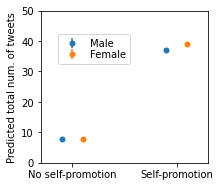

In [9]:
step = 1
xs_1 = 1.2 + np.arange(2) * step
xs_2 = 1.4 + np.arange(2) * step
pos = 1.3 + np.arange(2) * step

fig, ax = plt.subplots(figsize = (3, 2.8))

ax.errorbar(xs_1, means[0], yerr=male_ci, color=colors[0], fmt='o', markersize=5, label='Male')
ax.errorbar(xs_2, means[1], yerr=female_ci, color=colors[1], fmt='o', markersize=5, label='Female')
# ax.axvline(0.8, color='k', linestyle='--')
legend = ax.legend(loc=[0.1, 0.65], numpoints=1, labelspacing = 0.15, shadow=False, frameon = True)
ax.set_xticks(pos)
ax.set_xticklabels(['No self-promotion', 'Self-promotion'], rotation=0, ha='center')
ax.set_ylabel('Predicted total num. of tweets')
ax.set_ylim([0, 50])
ax.set_xlim([pos[0]-0.3, pos[-1]+0.3])
plt.show()
# fig.savefig('pred_gender_return.pdf', bbox_inches='tight', pad_inches=0.01)

### (Outdated) Plot regression coefficients (for return)

In [ ]:
# genderFemale & 0.017 (0.013, 0.021) \\ 
# self\_promotionTrue & 1.566 (1.558, 1.575) \\ 
# genderFemale:self\_promotionTrue & 0.034 (0.019, 0.049) \\ 
# authorship\_posfirst\_position & $-$0.005 ($-$0.012, 0.002) \\ 
# authorship\_posmiddle\_position & 0.267 (0.262, 0.273) \\ 
# authorship\_possolo\_author & $-$0.205 ($-$0.223, $-$0.188) \\ 
# author\_pub\_count\_cate & 0.014 (0.013, 0.014) \\ 
# affiliation\_rank\_cate & $-$0.025 ($-$0.026, $-$0.025) \\ 
# affiliation\_cateinternational & $-$0.115 ($-$0.119, $-$0.111) \\ 
# affiliation\_cateunknown & 0.659 (0.618, 0.700) \\ 
# num\_authors & 0.0001 (0.0001, 0.0001) \\ 
# journal\_impact & 0.095 (0.094, 0.095) \\ 
# Constant & 1.729 (1.721, 1.737) \\ 

In [55]:
ylabels = [
    'Female',
    'Self promotion = True',
    'Female x (Self promotion = True)',
    'First position',
    'Middle position',
    'Solo author',
    'Author pub. count category',
    'Affiliation rank category',
    'Affiliation location = International',
    'Affiliation location = Unknown',
    'Number of authors',
    'Journal impact'
]

# xs = [0.017, 1.566, 0.034, -0.005, 0.267, -0.205, 0.014, -0.025, -0.115, 0.659, 0.0001, 0.095]

In [66]:
# CI_li = np.array([
#     (0.013, 0.021),
#     (1.558, 1.575),
#     (0.019, 0.049),
#     (-0.012, 0.002),
#     (0.262, 0.273),
#     (-0.223, -0.188),
#     (0.013, 0.014),
#     (-0.026, -0.025),
#     (-0.119, -0.111),
#     (0.618, 0.700),
#     (0.0001, 0.0001),
#     (0.094, 0.095)
# ])

In [70]:
confs = CI_li[:, 1] - np.mean(CI_li, axis=1)

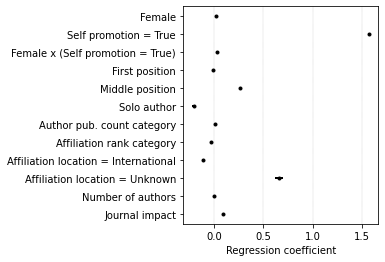

In [79]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.5, 4))

# ax.set_xticks(np.arange(-0.2, 0.11, 0.1), minor=True)
ax.xaxis.grid(linestyle='--', linewidth=0.2, color='gray', which='both')
# ax.axvline(0, color='k', linestyle='--', linewidth = 1)
ax.errorbar(xs[::-1], ylabels[::-1], xerr=confs[::-1], color='k', fmt='o', markersize=3, linewidth=2)
ax.set_axisbelow(True)
ax.set_xlabel('Regression coefficient')
plt.show()
fig.savefig('./return_nbr_coeffs.pdf', bbox_inches='tight', pad_inches=0.01)

## Adjusted prediction of self-promotion rate

### Original vs. Retweets vs. All

In [10]:
df_re = pd.read_csv(Data_Root + 'pred_retweet.csv', header=0)
df_org = pd.read_csv(Data_Root + 'pred_original.csv', header=0)
df_all = pd.read_csv(Data_Root + 'pred_all_tweet.csv', header=0)

In [11]:
df_re

,x,predicted,std.error,conf.low,conf.high,group
0,Male,0.040710,0.011995,0.039802,0.041638,1
1,Female,0.031986,0.013024,0.031205,0.032786,1


In [12]:
df_org

,x,predicted,std.error,conf.low,conf.high,group
0,Male,0.093187,0.008417,0.091802,0.094590,1
1,Female,0.072266,0.009461,0.071033,0.073519,1


In [13]:
df_all

,x,predicted,std.error,conf.low,conf.high,group
0,Male,0.104001,0.008661,0.102430,0.105594,1
1,Female,0.080961,0.009461,0.079592,0.082352,1


In [14]:
means = np.array(
        [[df_all.at[0, 'predicted'], df_org.at[0, 'predicted'], df_re.at[0, 'predicted']],
         [df_all.at[1, 'predicted'], df_org.at[1, 'predicted'], df_re.at[1, 'predicted']]])

In [15]:
male_ci = np.array(
        [[df_all.at[0, 'predicted'] - df_all.at[0, 'conf.low'], df_org.at[0, 'predicted'] - df_org.at[0, 'conf.low'], df_re.at[0, 'predicted'] - df_re.at[0, 'conf.low']],
        [df_all.at[0, 'conf.high'] - df_all.at[0, 'predicted'], df_org.at[0, 'conf.high'] - df_org.at[0, 'predicted'], df_re.at[0, 'conf.high'] - df_re.at[0, 'predicted']]])

female_ci = np.array(
    [[df_all.at[1, 'predicted'] - df_all.at[1, 'conf.low'], df_org.at[1, 'predicted'] - df_org.at[1, 'conf.low'], df_re.at[1, 'predicted'] - df_re.at[1, 'conf.low']],
    [df_all.at[1, 'conf.high'] - df_all.at[1, 'predicted'], df_org.at[1, 'conf.high'] - df_org.at[1, 'predicted'], df_re.at[1, 'conf.high'] - df_re.at[1, 'predicted']]])


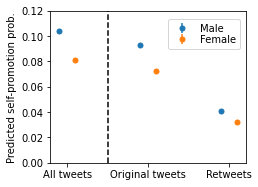

In [21]:
# step = 1
# xs_1 = 0.2 + np.arange(3) * step
# xs_2 = 0.4 + np.arange(3) * step
# pos = 0.3 + np.arange(3) * step

# fig, ax = plt.subplots(figsize = (3.5, 2.8))

# ax.errorbar(xs_1, means[0], yerr=male_ci, color=colors[0], fmt='o', markersize=5, label='Male')
# ax.errorbar(xs_2, means[1], yerr=female_ci, color=colors[1], fmt='o', markersize=5, label='Female')
# ax.axvline(0.8, color='k', linestyle='--')
# legend = ax.legend(loc=[0.6, 0.75], numpoints=1, labelspacing = 0.15, shadow=False, frameon = True)
# ax.set_xticks(pos)
# ax.set_xticklabels(['All tweets', 'Original tweets', 'Retweets'], rotation=0, ha='center')
# ax.set_ylabel('Predicted self-promotion prob.')
# ax.set_ylim([0, 0.12])
# plt.show()
# fig.savefig('pred_gender_si.pdf', bbox_inches='tight', pad_inches=0.01)

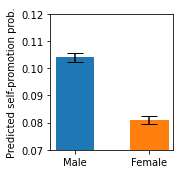

In [22]:
fig, ax = plt.subplots(figsize = (2.2, 2.5))

xpos = [0, 1]
barlist = ax.bar(xpos, means[:, 0], yerr = np.array([male_ci[:, 0], female_ci[:, 0]]).T, width = 0.5, alpha = 1.0, capsize = 8)
barlist[0].set_color(colors[0])
barlist[1].set_color(colors[1])

ax.set_xticks(xpos)
ax.set_xticklabels(labels)
ax.yaxis.grid(False)
ax.set_ylabel('Predicted self-promotion prob.')
ax.set_ylim([0.07, 0.12])

plt.show()
fig.savefig('pred_gender.pdf', bbox_inches='tight', pad_inches=0.01)


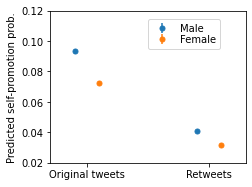

In [23]:
step = 1
xs_1 = 0.2 + np.arange(2) * step
xs_2 = 0.4 + np.arange(2) * step
pos = 0.3 + np.arange(2) * step

fig, ax = plt.subplots(figsize = (3.5, 2.8))

ax.errorbar(xs_1, means[0][1:], yerr=male_ci[:, 1:], color=colors[0], fmt='o', markersize=5, label='Male')
ax.errorbar(xs_2, means[1][1:], yerr=female_ci[:, 1:], color=colors[1], fmt='o', markersize=5, label='Female')
legend = ax.legend(loc=[0.5, 0.75], numpoints=1, labelspacing = 0.15, shadow=False, frameon = True)
ax.set_xticks(pos)
ax.set_xticklabels(['Original tweets', 'Retweets'], rotation=0, ha='center')
ax.set_ylabel('Predicted self-promotion prob.')
ax.set_ylim([0.02, 0.12])
ax.set_xlim([0, 1.6])
plt.show()
fig.savefig('pred_gender_si.pdf', bbox_inches='tight', pad_inches=0.01)

### Journal impact

In [55]:
df = pd.read_csv(Data_Root + 'gender_jif.csv', header=0)

In [56]:
df

,x,predicted,std.error,conf.low,conf.high,group
0,0,0.089615,0.009312,0.088137,0.091115,Male
1,0,0.074494,0.010471,0.073091,0.075921,Female
2,5,0.106797,0.008625,0.105195,0.108421,Male
3,5,0.084935,0.009456,0.083506,0.086387,Female
4,10,0.126815,0.008888,0.124898,0.128756,Male
5,10,0.096687,0.009784,0.095025,0.098375,Female
6,15,0.149954,0.010027,0.147466,0.152477,Male
7,15,0.109870,0.011339,0.107715,0.112063,Female
8,20,0.176463,0.011792,0.173129,0.179847,Male
9,20,0.124603,0.013710,0.121701,0.127563,Female


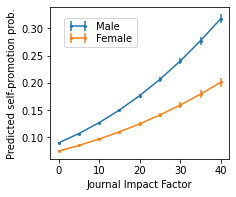

In [59]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.2, 2.8))

for i, gender, color in zip(range(len(labels)), labels, colors):
    xs = np.array(df.loc[df.group==gender, 'x'].tolist())
    # xs = xs + 0.3 * (i-3)
    ys = np.array(df.loc[df.group==gender, 'predicted'].tolist())
    lows = ys - np.array(df.loc[df.group==gender, 'conf.low'].tolist())
    upps = np.array(df.loc[df.group==gender, 'conf.high'].tolist()) - ys
    errors = np.array([lows, upps])
    ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=gender)
    
# ax.legend(bbox_to_anchor=(1, -0.03), loc='lower left', labelspacing = 1.05, frameon = True)
legend = ax.legend(bbox_to_anchor=(0.05, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.margins(0,0)
# ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_xlabel('Journal Impact Factor')
ax.set_ylabel('Predicted self-promotion prob.')

# plt.tight_layout()
plt.show()
fig.savefig('./gender_jif.pdf', bbox_inches='tight', pad_inches=0.01)

### Affiliation rank

In [27]:
df = pd.read_csv(Data_Root + 'gender_affi.csv', header=0)

In [28]:
df

,x,predicted,std.error,conf.low,conf.high,group
0,0,0.124801,0.010333,0.122606,0.127030,Male
1,0,0.100210,0.011986,0.098111,0.102348,Female
2,1,0.119281,0.009638,0.117311,0.121280,Male
3,1,0.095034,0.010913,0.093210,0.096889,Female
4,2,0.113974,0.009109,0.112183,0.115789,Male
5,2,0.090098,0.010094,0.088490,0.091734,Female
6,3,0.108873,0.008776,0.107216,0.110554,Male
7,3,0.085395,0.009594,0.083938,0.086875,Female
8,4,0.103974,0.008661,0.102404,0.105567,Male
9,4,0.080916,0.009464,0.079547,0.082306,Female


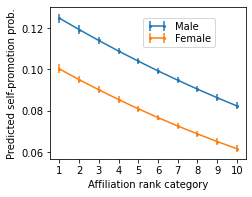

In [29]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.5, 2.8))

for i, gender, color in zip(range(len(labels)), labels, colors):
    xs = np.array(df.loc[df.group==gender, 'x'].tolist())
    # xs = xs + 0.3 * (i-3)
    ys = np.array(df.loc[df.group==gender, 'predicted'].tolist())
    lows = ys - np.array(df.loc[df.group==gender, 'conf.low'].tolist())
    upps = np.array(df.loc[df.group==gender, 'conf.high'].tolist()) - ys
    errors = np.array([lows, upps])
    ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=gender)
    
# ax.legend(bbox_to_anchor=(1, -0.03), loc='lower left', labelspacing = 1.05, frameon = True)
legend = ax.legend(bbox_to_anchor=(0.45, 0.7), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.margins(0,0)
# ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_xticks(xs)
ax.set_xticklabels(list(range(1, 11)))
ax.set_xlabel('Affiliation rank category')
ax.set_ylabel('Predicted self-promotion prob.')

# plt.tight_layout()
plt.show()
fig.savefig('./gender_affi.pdf', bbox_inches='tight', pad_inches=0.01)

### Previous num. publications

In [52]:
df = pd.read_csv(Data_Root + 'gender_pub.csv', header=0)

In [53]:
df

,x,predicted,std.error,conf.low,conf.high,group
0,0,0.046019,0.018174,0.044480,0.047608,Male
1,0,0.034275,0.019042,0.033061,0.035532,Female
2,1,0.061178,0.013969,0.059624,0.062769,Male
3,1,0.046667,0.014395,0.045428,0.047939,Female
4,2,0.076902,0.011143,0.075366,0.078467,Male
5,2,0.059732,0.011886,0.058437,0.061054,Female
6,3,0.091565,0.009554,0.090019,0.093134,Male
7,3,0.071986,0.010807,0.070584,0.073414,Female
8,4,0.103467,0.008917,0.101857,0.105100,Male
9,4,0.081827,0.010377,0.080312,0.083368,Female


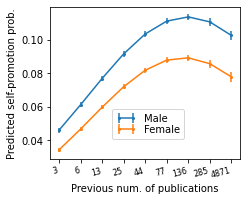

In [54]:
nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.5, 2.8))

for i, gender, color in zip(range(len(labels)), labels, colors):
    xs = np.array(df.loc[df.group==gender, 'x'].tolist())
    # xs = xs + 0.3 * (i-3)
    ys = np.array(df.loc[df.group==gender, 'predicted'].tolist())
    lows = ys - np.array(df.loc[df.group==gender, 'conf.low'].tolist())
    upps = np.array(df.loc[df.group==gender, 'conf.high'].tolist()) - ys
    errors = np.array([lows, upps])
    ax.errorbar(xs, ys, yerr=errors, color=color, alpha=1, fmt='-o', markersize=2, linewidth=1.5, label=gender)
    
# ax.legend(bbox_to_anchor=(1, -0.03), loc='lower left', labelspacing = 1.05, frameon = True)
legend = ax.legend(bbox_to_anchor=(0.3, 0.1), loc='lower left', numpoints=2, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.margins(0,0)
# ax.set_yticks([0.2, 0.4, 0.6, 0.8])
ax.set_xticks(xs)
ax.set_xticklabels([3, 6, 13, 25, 44, 77, 136, 285, 4871])
for tick in ax.get_xticklabels():
    tick.set_ha('right')
    tick.set_fontsize(8)
    tick.set_rotation(15)
ax.set_xlabel('Previous num. of publications')
ax.set_ylabel('Predicted self-promotion prob.')

# plt.tight_layout()
plt.show()
fig.savefig('./gender_pub.pdf', bbox_inches='tight', pad_inches=0.01)


### Discipline

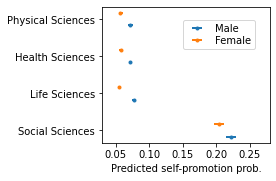

In [34]:
# name_map = {'social': 'Social Sciences',
#             'life': 'Life Sciences',
#             'health': 'Health Sciences',
#             'phy': 'Physical Sciences'}

# step = 3
# ys_1 = 1 + np.arange(4) * step
# ys_2 = 2 + np.arange(4) * step
# y_pos = 1.5 + np.arange(4) * step

# nrows = 1
# ncols = 1
# fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3, 2.5))

# for i, gender, color, ys in zip(range(len(labels)), labels, colors, [ys_1, ys_2]):
#     xs = []
#     xs_low = []
#     xs_hi = []
#     for j, fname in enumerate(name_map.keys()):
#         df = pd.read_csv(Data_Root + 'pred_%s.csv'%fname, header=0)
#         a, b, c = df.loc[df.x==gender][['predicted', 'conf.low', 'conf.high']].values[0]
#         xs.append(a)
#         xs_low.append(b)
#         xs_hi.append(c)
#     errors = np.array([np.array(xs) - np.array(xs_low), np.array(xs_hi) - np.array(xs)])
#     ax.errorbar(xs, ys, xerr=errors, color=color, alpha=1, fmt='o', markersize=3, linewidth=2, label=gender)
    
# legend = ax.legend(bbox_to_anchor=(0.45, 0.65), loc='lower left', numpoints=1, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
# ax.set_xlabel('Predicted self-promotion prob.')

# ax.set_xlim([0.03, 0.28])
# # ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
# ax.set_yticks(y_pos)
# ax.set_yticklabels([name_map[disc] for disc in name_map], rotation=0, ha='right')
# # plt.tight_layout()
# plt.show()
# # fig.savefig('./pred_discipline.pdf', bbox_inches='tight', pad_inches=0.01)

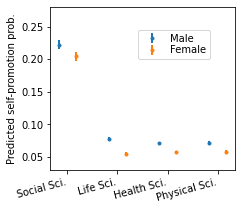

In [50]:
name_map = {'social': 'Social Sci.',
            'life': 'Life Sci.',
            'health': 'Health Sci.',
            'phy': 'Physical Sci.'}

step = 3
ys_1 = 1 + np.arange(4) * step
ys_2 = 2 + np.arange(4) * step
y_pos = 1.5 + np.arange(4) * step

nrows = 1
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(3.3, 3))

for i, gender, color, ys in zip(range(len(labels)), labels, colors, [ys_1, ys_2]):
    xs = []
    xs_low = []
    xs_hi = []
    for j, fname in enumerate(name_map.keys()):
        df = pd.read_csv(Data_Root + 'pred_%s.csv'%fname, header=0)
        a, b, c = df.loc[df.x==gender][['predicted', 'conf.low', 'conf.high']].values[0]
        xs.append(a)
        xs_low.append(b)
        xs_hi.append(c)
    errors = np.array([np.array(xs) - np.array(xs_low), np.array(xs_hi) - np.array(xs)])
    ax.errorbar(ys, xs, yerr=errors, color=color, alpha=1, fmt='o', markersize=3, linewidth=2, label=gender)
    
legend = ax.legend(bbox_to_anchor=(0.45, 0.65), loc='lower left', numpoints=1, labelspacing = 0.15, shadow=False, frameon = True, markerscale = 1)
ax.set_ylabel('Predicted self-promotion prob.')

ax.set_ylim([0.03, 0.28])
# ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
ax.set_xticks(y_pos)
ax.set_xticklabels([name_map[disc] for disc in name_map], rotation=15, ha='right')
# plt.tight_layout()
plt.show()
fig.savefig('./pred_discipline.pdf', bbox_inches='tight', pad_inches=0.01)